# <center>Network Science</center>

## <center>Home Assignment #3: Centralities and Assortativity</center>

### <center>Student: *{Komissarova Daria}*</center>

#### <hr /> General Information

**Due Date:** 13.03.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Compute degree centrality, Pagerank and  HubAuthorities scores for the [flickr](https://snap.stanford.edu/data/web-flickr.html) network. 

Data contains sparse matrix A and list of user names.
This is a “denser” part of the Flickr photo sharing site friendship graph from 2006. Edge direction corresponds to friendship requests (following). Some of the links are reciprocal,others not.  

Provide top 50 names in each ranking, compare results

You can load .mat files with the following commands:

#### Task 1

##### 1) 
Firstly, lets create a directed graph G.
Then, we find degree centrality and page rank for our nodes.
As we can see (on the figure), this coefficients have strong lineal relation.
It means, the larger friendship requests (a person has), the more probability to visit his page from any user. 

On the lists of users with the biggest value of coefficients, we can see that these list looks similar, in particular, they have almost the same top-5 users.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import numpy.random as rnd
import networkx as nx
import random
import operator
%matplotlib inline
import scipy.io as sio

from scipy.sparse import lil_matrix

from scipy.sparse.linalg import dsolve

data = sio.loadmat('flickr.mat')

#print(sio.whosmat('flickr.mat'))

matr = data['A']


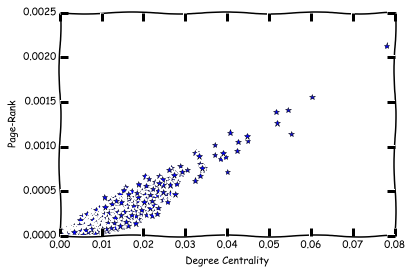

In [12]:
G = nx.DiGraph(matr)
pr = nx.pagerank(G, alpha=0.9)
pr = pr.values()
d = nx.degree_centrality(G)
d = d.values()

plt.plot(d, pr, '*')
plt.xlabel('Degree Centrality')
plt.ylabel('Page-Rank')

In [17]:
pr2 = [[pr[i],i] for i in xrange(len(pr))]
pr_sort = sorted(pr2, key=lambda row: row[0], reverse=True)
print('list_pagerank-----')
for pr_obj in pr_sort[:50]:
    print(names[pr_obj[1]])

    
d2 = [[d[i],i] for i in xrange(len(d))]
d_sort = sorted(d2, key=lambda row: row[0], reverse=True)
print('list_degree_centrality----')
for d_obj in d_sort[:50]:
    print(names[d_obj[1]])

list_pagerank-----
awfulsara                                           
drp                                                 
antimethod                                          
BombDog                                             
*Ivan*                                              
MaD GiÂ®Lâ¢â¢                                     
DrJoanne                                            
Simon Pais                                          
deborah lattimore                                   
cymagen                                             
:Nikola                                             
notraces                                            
jkottke                                             
slowernet                                           
lorrainemd                                          
artofgold                                           
romanlily                                           
*starlet*                                           
Pandarine                  

##### 2) 
Secondly, we compute hubs and authority coefficient.
We can point out: 1) there are a few user's pages, which have high level of authorities and many pages with low level; 2) we can devide all data into 2 classes in complience with authority level; 3) in this case it is hardly to find a relation between hubs and authority.

But according to lists of the users, in this case authorities has strong relation to the degree centrality and page rank coefficients, in contrast to hubs coefficien. 

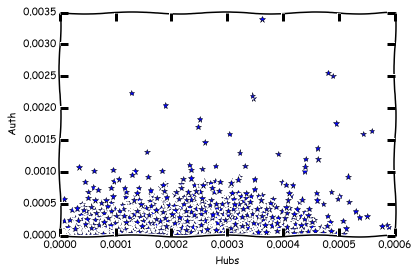

In [13]:
(h, a) = nx.hits(G)
h=h.values()
a=a.values()
plt.plot(h,a, '*')
plt.xlabel('Hubs')
plt.ylabel('Auth')

In [18]:
 
h2 = [[h[i],i] for i in xrange(len(h))]
h_sort = sorted(h2, key=lambda row: row[0], reverse=True)

print('list_habs------')
names = data['names']
for h_obj in h_sort[:50]:
    print(names[h_obj[1]])
    
    
a2 = [[a[i],i] for i in xrange(len(a))]
a_sort = sorted(a2, key=lambda row: row[0], reverse=True)
print('list_authorities------')
for a_obj in a_sort[:50]:
    print(names[a_obj[1]])



list_habs------
mrpiink                                             
automat                                             
schizoo23                                           
lorrainemd                                          
sgoralnick                                          
*starlet*                                           
brynfoto                                            
liquid pixel                                        
noahstone                                           
isherwood                                           
Arno-MM                                             
scotsman0170                                        
WaveSpire                                           
tozzer                                              
...cathzilla                                        
cymagen                                             
ola_babe1                                           
DrJoanne                                            
pablokorona                   

### <hr /> Task 2

Here are the [Facebook friendship graphs](https://snap.stanford.edu/data/egonets-Facebook.html) from several US universities from 2005 (one year after fb launch).

Data contains a A matrix (sparse) and a "local_info" variable, one row per node: 
a student/faculty status flag, gender, major, second major/minor (if applicable), dorm/house, year, and high school. 
Missing data is coded 0.

Compute node degree assortativity (mixining by node degree) and assortativity coefficient (modularity) for gender, major, dormitory, year, high school for all universities and compare the results.

In [20]:
data = sio.loadmat('Berkeley13.mat')

#print(sio.whosmat('Berkeley13.mat'))

matrBerk = data['A']
infoBerk = data['local_info']

GBerk = nx.DiGraph(matrBerk)
n = 22937


In [34]:
ch_team = {} #[[i, infoBerk[i]] for i in GBerk.nodes()] #  for i in xrange(len(infoBerk))
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,1]
        
nx.set_node_attributes(GBerk, 'gender', ch_team)
q = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'gender')
as_dict = nx.assortativity.attribute_mixing_dict(GBerk, 'gender')

In [35]:
print(q)

(0.040922837639318366, {0: {0: 7406, 1: 55891, 2: 45645}, 1: {0: 55891, 1: 469444, 2: 351022}, 2: {0: 45645, 1: 351022, 2: 322922}})


In [36]:
e = nx.degree_assortativity_coefficient(GBerk)

In [37]:
print(e)

0.0103134590889


In [38]:
ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,2]       
nx.set_node_attributes(GBerk, 'major', ch_team)
q1 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'major')


ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,4]     
nx.set_node_attributes(GBerk, 'dorm', ch_team)
q2 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'dorm')


ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,5]     
nx.set_node_attributes(GBerk, 'year', ch_team)
q3 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'year')

ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,6]     
nx.set_node_attributes(GBerk, 'highS', ch_team)
q4 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'highS')

print('gender, major, dormitory, year, high school', q,q1,q2,q3,q4)





('gender, major, dormitory, year, high school', 0.040922837639318366, 0.05825502994601474, 0.1472764407599787, 0.3081210158062389, 0.07737536535425946)


As we can see, the node degree doesn't influence in node relations, because the node degree assortativity is close to zeros.
Also the assortativity coefficient (modularity) for gender, major, dormitory, high school are small enough. It means that these attributes also doesnt't relate with node linking. In the contrance, assortativity coefficient (modularity) for year is higher.


In [39]:
data = sio.loadmat('Harvard1.mat')

#print(sio.whosmat('Berkeley13.mat'))

matrBerk = data['A']
infoBerk = data['local_info']

GBerk = nx.DiGraph(matrBerk)

ch_team = {} #[[i, infoBerk[i]] for i in GBerk.nodes()] #  for i in xrange(len(infoBerk))
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,1]
        
nx.set_node_attributes(GBerk, 'gender', ch_team)
q = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'gender')
e = nx.degree_assortativity_coefficient(GBerk)

ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,2]       
nx.set_node_attributes(GBerk, 'major', ch_team)
q1 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'major')


ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,4]     
nx.set_node_attributes(GBerk, 'dorm', ch_team)
q2 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'dorm')


ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,5]     
nx.set_node_attributes(GBerk, 'year', ch_team)
q3 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'year')

ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,6]     
nx.set_node_attributes(GBerk, 'highS', ch_team)
q4 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'highS')

print('gender, major, dormitory, year, high school', q,q1,q2,q3,q4)



('gender, major, dormitory, year, high school', 0.04526997737944215, 0.04967692832862898, 0.12567663504955817, 0.4211596421160826, 0.023986725374059718)


In [41]:
data = sio.loadmat('Caltech36.mat')

#print(sio.whosmat('Berkeley13.mat'))

matrBerk = data['A']
infoBerk = data['local_info']

GBerk = nx.DiGraph(matrBerk)

ch_team = {} #[[i, infoBerk[i]] for i in GBerk.nodes()] #  for i in xrange(len(infoBerk))
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,1]
        
nx.set_node_attributes(GBerk, 'gender', ch_team)
q = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'gender')
e = nx.degree_assortativity_coefficient(GBerk)

ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,2]       
nx.set_node_attributes(GBerk, 'major', ch_team)
q1 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'major')


ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,4]     
nx.set_node_attributes(GBerk, 'dorm', ch_team)
q2 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'dorm')


ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,5]     
nx.set_node_attributes(GBerk, 'year', ch_team)
q3 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'year')

ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,6]     
nx.set_node_attributes(GBerk, 'highS', ch_team)
q4 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'highS')

print('gender, major, dormitory, year, high school', q,q1,q2,q3,q4)

('gender, major, dormitory, year, high school', 0.04633143645586916, 0.03471942372358318, 0.3491531008726444, 0.23753190481288217, 0.002669779306576863)


In [42]:
data = sio.loadmat('Princeton12.mat')

#print(sio.whosmat('Berkeley13.mat'))

matrBerk = data['A']
infoBerk = data['local_info']

GBerk = nx.DiGraph(matrBerk)

ch_team = {} #[[i, infoBerk[i]] for i in GBerk.nodes()] #  for i in xrange(len(infoBerk))
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,1]
        
nx.set_node_attributes(GBerk, 'gender', ch_team)
q = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'gender')
e = nx.degree_assortativity_coefficient(GBerk)

ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,2]       
nx.set_node_attributes(GBerk, 'major', ch_team)
q1 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'major')


ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,4]     
nx.set_node_attributes(GBerk, 'dorm', ch_team)
q2 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'dorm')


ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,5]     
nx.set_node_attributes(GBerk, 'year', ch_team)
q3 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'year')

ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,6]     
nx.set_node_attributes(GBerk, 'highS', ch_team)
q4 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'highS')

print('gender, major, dormitory, year, high school', q,q1,q2,q3,q4)

('gender, major, dormitory, year, high school', 0.05061073999529183, 0.054390118871393854, 0.09467841955418972, 0.44674462058408704, 0.018783655244969697)


In [43]:
data = sio.loadmat('Texas80.mat')

#print(sio.whosmat('Berkeley13.mat'))

matrBerk = data['A']
infoBerk = data['local_info']

GBerk = nx.DiGraph(matrBerk)

ch_team = {} #[[i, infoBerk[i]] for i in GBerk.nodes()] #  for i in xrange(len(infoBerk))
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,1]
        
nx.set_node_attributes(GBerk, 'gender', ch_team)
q = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'gender')
e = nx.degree_assortativity_coefficient(GBerk)

ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,2]       
nx.set_node_attributes(GBerk, 'major', ch_team)
q1 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'major')


ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,4]     
nx.set_node_attributes(GBerk, 'dorm', ch_team)
q2 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'dorm')


ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,5]     
nx.set_node_attributes(GBerk, 'year', ch_team)
q3 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'year')

ch_team = {} 
for i in GBerk.nodes():
    ch_team[i] = infoBerk[i,6]     
nx.set_node_attributes(GBerk, 'highS', ch_team)
q4 = nx.assortativity.attribute_assortativity_coefficient(GBerk, 'highS')

print('gender, major, dormitory, year, high school', q,q1,q2,q3,q4)

('gender, major, dormitory, year, high school', 0.07969306814123493, 0.05971272783340577, 0.20483760433918657, 0.2461946841617454, 0.14799284823051465)


As we can see, the close results we have to other universities. However, there is a high influence of dormitory in Caltech and Texas. 